___________
## Plot ZIP codes with highlighted overlay of selected ZIP codes

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
longlat_df = pd.read_csv('./Data/zipcode_database.csv')

In [3]:
longlat_df.head()

,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages
0,705,STANDARD,AIBONITO,PR,PRIMARY,18.14,-66.26,NA-US-PR-AIBONITO,False,NaN,NaN,NaN
1,610,STANDARD,ANASCO,PR,PRIMARY,18.28,-67.14,NA-US-PR-ANASCO,False,NaN,NaN,NaN
2,611,PO BOX,ANGELES,PR,PRIMARY,18.28,-66.79,NA-US-PR-ANGELES,False,NaN,NaN,NaN
3,612,STANDARD,ARECIBO,PR,PRIMARY,18.45,-66.73,NA-US-PR-ARECIBO,False,NaN,NaN,NaN
4,601,STANDARD,ADJUNTAS,PR,PRIMARY,18.16,-66.72,NA-US-PR-ADJUNTAS,False,NaN,NaN,NaN


In [4]:
### create separate wb to condense zipcode_database.csv
# remove unnecessary columns (ZipCodeType, LocationType, Location, Decommisioned, TaxReturnsFiled, EstimatedPopulation, TotalWages)
# remove unnecessary row (ZipCodeType != STANDARD, Decommisioned == False, ?TaxReturnsFiled == np.nan, State != [list50states], etc.)

In [5]:
# investigate choropleth:  folium, mapclassify, cartopy

In [6]:
top = 49.3457868 # north lat
left = -124.7844079 # west long
right = -66.9513812 # east long
bottom =  24.7433195 # south lat

In [18]:
sf_df = pd.read_csv('./Data/sf_county_zips.csv')

In [20]:
sf_list = list(sf_df['zip'])

In [40]:
cont_df = longlat_df[(longlat_df['Lat'] > bottom) & 
                     (longlat_df['Lat'] < top) & 
                     (longlat_df['Long'] < right) & 
                     (longlat_df['Long'] > left)]

In [41]:
cont_df.reset_index(drop=True, inplace=True)

In [42]:
cont_df.head()

,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages
0,7675,STANDARD,WESTWOOD,NJ,PRIMARY,40.98,-74.03,NA-US-NJ-WESTWOOD,False,13245.0,24083.0,1.089095e+09
1,7677,STANDARD,WOODCLIFF LAKE,NJ,PRIMARY,41.02,-74.05,NA-US-NJ-WOODCLIFF LAKE,False,2945.0,5471.0,3.254370e+08
2,7885,STANDARD,WHARTON,NJ,PRIMARY,40.89,-74.58,NA-US-NJ-WHARTON,False,5273.0,8999.0,2.408280e+08
3,7981,STANDARD,WHIPPANY,NJ,PRIMARY,40.82,-74.41,NA-US-NJ-WHIPPANY,False,4585.0,8057.0,2.920968e+08
4,7999,STANDARD,WHIPPANY,NJ,PRIMARY,40.82,-74.41,NA-US-NJ-WHIPPANY,False,NaN,NaN,NaN


In [46]:
cont_df['selected'] = 0

C:\Users\bdmir\Anaconda3\envs\dsi\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [47]:
cont_df.head()

,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages,selected
0,7675,STANDARD,WESTWOOD,NJ,PRIMARY,40.98,-74.03,NA-US-NJ-WESTWOOD,False,13245.0,24083.0,1.089095e+09,0
1,7677,STANDARD,WOODCLIFF LAKE,NJ,PRIMARY,41.02,-74.05,NA-US-NJ-WOODCLIFF LAKE,False,2945.0,5471.0,3.254370e+08,0
2,7885,STANDARD,WHARTON,NJ,PRIMARY,40.89,-74.58,NA-US-NJ-WHARTON,False,5273.0,8999.0,2.408280e+08,0
3,7981,STANDARD,WHIPPANY,NJ,PRIMARY,40.82,-74.41,NA-US-NJ-WHIPPANY,False,4585.0,8057.0,2.920968e+08,0
4,7999,STANDARD,WHIPPANY,NJ,PRIMARY,40.82,-74.41,NA-US-NJ-WHIPPANY,False,NaN,NaN,NaN,0


In [48]:
for i, zipcode in enumerate(cont_df['Zipcode']):
    if zipcode in sf_list:
        cont_df.loc[i,'selected'] = 1
        

C:\Users\bdmir\Anaconda3\envs\dsi\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


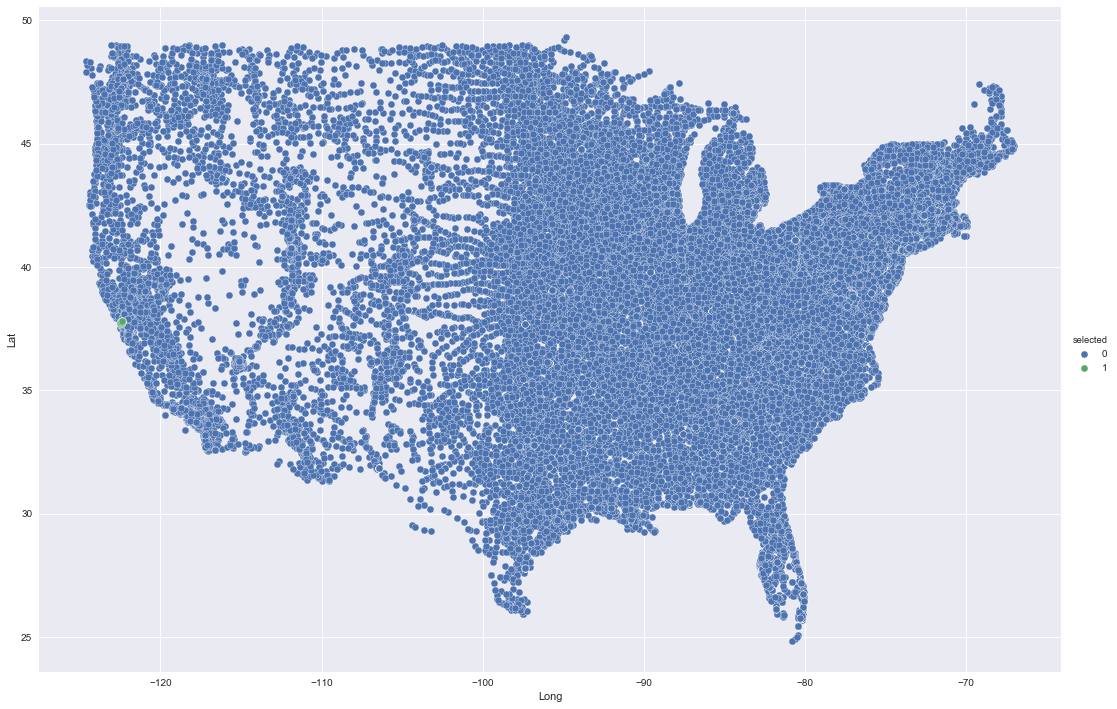

In [67]:
sns.pairplot(x_vars=['Long'], y_vars=['Lat'], data=cont_df, hue='selected', size=10, aspect=1.5)